In [5]:
import pandas as pd

# Load your datasets
gdp_data = pd.read_csv("../data/Countries GDP 1960-2020.csv")  # Adjust path as necessary
oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])

# Create 'Year' column from 'Date' in oil_data
oil_data['Year'] = oil_data['Date'].dt.year

# Reshape GDP Data from wide to long format
gdp_long = gdp_data.melt(id_vars=['Country Name', 'Country Code'], 
                          var_name='Year', 
                          value_name='GDP')

# Convert 'Year' to int in gdp_long
gdp_long['Year'] = gdp_long['Year'].astype(int)

# Print columns of both DataFrames
print("Oil Data Columns:", oil_data.columns)
print("GDP Long Data Columns:", gdp_long.columns)

# Check the types of the 'Year' column
print("Oil Data Year Type:", oil_data['Year'].dtype)
print("GDP Long Year Type:", gdp_long['Year'].dtype)

# Merge with oil data
merged_data = pd.merge(oil_data, gdp_long, on=['Year', 'Country Name', 'Country Code'], how='left')

# Check merged data
print("Merged Data Columns:", merged_data.columns)
print("Merged Data Sample:")
print(merged_data.head())


C:\Users\user\AppData\Local\Temp\ipykernel_11952\874946826.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])


Oil Data Columns: Index(['Date', 'Price', 'Year'], dtype='object')
GDP Long Data Columns: Index(['Country Name', 'Country Code', 'Year', 'GDP'], dtype='object')
Oil Data Year Type: int32
GDP Long Year Type: int32


KeyError: 'Country Name'

In [6]:
import pandas as pd

# Load your datasets
gdp_data = pd.read_csv("../data/Countries GDP 1960-2020.csv")  # Adjust path as necessary
oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])

# Create 'Year' column from 'Date' in oil_data
oil_data['Year'] = oil_data['Date'].dt.year

# Reshape GDP Data from wide to long format
gdp_long = gdp_data.melt(id_vars=['Country Name', 'Country Code'], 
                          var_name='Year', 
                          value_name='GDP')

# Convert 'Year' to int in gdp_long
gdp_long['Year'] = gdp_long['Year'].astype(int)

# Print columns of both DataFrames
print("Oil Data Columns:", oil_data.columns)
print("GDP Long Data Columns:", gdp_long.columns)

# Check for missing columns in oil_data for the merge
print("Checking for 'Country Name' and 'Country Code' in oil_data:")
print(oil_data.head())  # Displaying the first few rows of oil_data

# Merge with oil data (after checking column availability)
# This part might be skipped if 'Country Name' and 'Country Code' are not in oil_data
# Adjust based on what you find from the printout
if 'Country Name' in oil_data.columns and 'Country Code' in oil_data.columns:
    merged_data = pd.merge(oil_data, gdp_long, on=['Year', 'Country Name', 'Country Code'], how='left')
    print("Merged Data Columns:", merged_data.columns)
    print("Merged Data Sample:")
    print(merged_data.head())
else:
    print("The columns 'Country Name' or 'Country Code' are missing in oil_data.")


C:\Users\user\AppData\Local\Temp\ipykernel_11952\3960250388.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])


Oil Data Columns: Index(['Date', 'Price', 'Year'], dtype='object')
GDP Long Data Columns: Index(['Country Name', 'Country Code', 'Year', 'GDP'], dtype='object')
Checking for 'Country Name' and 'Country Code' in oil_data:
        Date  Price  Year
0 1987-05-20  18.63  1987
1 1987-05-21  18.45  1987
2 1987-05-22  18.55  1987
3 1987-05-25  18.60  1987
4 1987-05-26  18.63  1987
The columns 'Country Name' or 'Country Code' are missing in oil_data.


In [7]:
import pandas as pd

# Load the oil price data
oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])

# Extract the year from the date
oil_data['Year'] = oil_data['Date'].dt.year

# Get the average oil price for each year (if needed)
average_oil_data = oil_data.groupby('Year')['Price'].mean().reset_index()
average_oil_data['Country Name'] = "World"  # Add a placeholder for the country name
average_oil_data['Country Code'] = "WLD"     # Add a placeholder for the country code

# Load the GDP data
gdp_long = pd.read_csv("../data/Countries GDP 1960-2020.csv")  # Adjust the path accordingly

# Create a DataFrame with each country and the corresponding oil prices
# Use the unique years from GDP data
gdp_years = gdp_long['Year'].unique()

# Expand the average oil data for each country in the GDP data
oil_country_data = pd.merge(gdp_long[['Country Name', 'Country Code', 'Year']], 
                              average_oil_data, 
                              on='Year', 
                              how='left')

# Print columns to verify
print("Oil Data with Countries Columns:", oil_country_data.columns)

# Check merged data
print("Merged Data Sample:")
print(oil_country_data.head())


C:\Users\user\AppData\Local\Temp\ipykernel_11952\4200880479.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])


KeyError: 'Year'

In [9]:
import pandas as pd

# Load the oil price data
oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])

# Extract the year from the date
oil_data['Year'] = oil_data['Date'].dt.year

# Get the average oil price for each year
average_oil_data = oil_data.groupby('Year')['Price'].mean().reset_index()
average_oil_data['Country Name'] = "World"  # Placeholder for country name
average_oil_data['Country Code'] = "WLD"     # Placeholder for country code

# Load the GDP data
gdp_long = pd.read_csv("../data/Countries GDP 1960-2020.csv")  # Adjust the path accordingly

# Melt the GDP data from wide to long format
gdp_long_melted = pd.melt(gdp_long, id_vars=['Country Name', 'Country Code'], 
                           var_name='Year', value_name='GDP')

# Convert 'Year' to integer for matching
gdp_long_melted['Year'] = gdp_long_melted['Year'].astype(int)

# Merge the reshaped GDP data with average oil price data
oil_country_data = pd.merge(gdp_long_melted, average_oil_data, on='Year', how='left')

# Print the first few rows of the merged data
print("Merged Data Sample:")
print(oil_country_data.head())


C:\Users\user\AppData\Local\Temp\ipykernel_11952\2524757890.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  oil_data = pd.read_csv("../data/Copy of BrentOilPrices.csv", parse_dates=['Date'])


Merged Data Sample:
                Country Name_x Country Code_x  Year           GDP  Price  \
0  Africa Eastern and Southern            AFE  1960  1.931311e+10    NaN   
1   Africa Western and Central            AFW  1960  1.040428e+10    NaN   
2                    Australia            AUS  1960  1.860679e+10    NaN   
3                      Austria            AUT  1960  6.592694e+09    NaN   
4                      Burundi            BDI  1960  1.960000e+08    NaN   

  Country Name_y Country Code_y  
0            NaN            NaN  
1            NaN            NaN  
2            NaN            NaN  
3            NaN            NaN  
4            NaN            NaN  


In [10]:
# Print unique years from both dataframes
print("Unique Years in Average Oil Data:")
print(average_oil_data['Year'].unique())

print("\nUnique Years in GDP Data:")
print(gdp_long_melted['Year'].unique())


Unique Years in Average Oil Data:
[1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022]

Unique Years in GDP Data:
[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015
 2016 2017 2018 2019 2020]


In [12]:
# Step 1: Filter the GDP data for years that exist in average oil data
gdp_filtered = gdp_long_melted[gdp_long_melted['Year'].isin(average_oil_data['Year'].unique())]

# Step 2: Merge the filtered GDP data with the average oil price data
oil_country_data = pd.merge(gdp_filtered, average_oil_data, on='Year', how='left')

# Step 3: Print the first few rows of the merged data to verify
print("Merged Data Sample After Filtering:")
print(oil_country_data.head())


Merged Data Sample After Filtering:
                Country Name_x Country Code_x  Year           GDP      Price  \
0  Africa Eastern and Southern            AFE  1987  1.800000e+11  18.525813   
1   Africa Western and Central            AFW  1987  1.100000e+11  18.525813   
2                    Australia            AUS  1987  1.890000e+11  18.525813   
3                      Austria            AUT  1987  1.240000e+11  18.525813   
4                      Burundi            BDI  1987  1.131466e+09  18.525813   

  Country Name_y Country Code_y  
0          World            WLD  
1          World            WLD  
2          World            WLD  
3          World            WLD  
4          World            WLD  


In [13]:
# Drop unnecessary columns if not needed
oil_country_data_cleaned = oil_country_data.drop(columns=['Country Name_y', 'Country Code_y'])

# Rename columns for clarity if needed
oil_country_data_cleaned.rename(columns={'Country Name_x': 'Country Name', 'Country Code_x': 'Country Code'}, inplace=True)

# Print the cleaned data
print("Cleaned Merged Data Sample:")
print(oil_country_data_cleaned.head())


Cleaned Merged Data Sample:
                  Country Name Country Code  Year           GDP      Price
0  Africa Eastern and Southern          AFE  1987  1.800000e+11  18.525813
1   Africa Western and Central          AFW  1987  1.100000e+11  18.525813
2                    Australia          AUS  1987  1.890000e+11  18.525813
3                      Austria          AUT  1987  1.240000e+11  18.525813
4                      Burundi          BDI  1987  1.131466e+09  18.525813


In [14]:
correlation = oil_country_data_cleaned['GDP'].corr(oil_country_data_cleaned['Price'])
print(f"Correlation between GDP and Oil Price: {correlation}")


Correlation between GDP and Oil Price: 0.1353160606380097


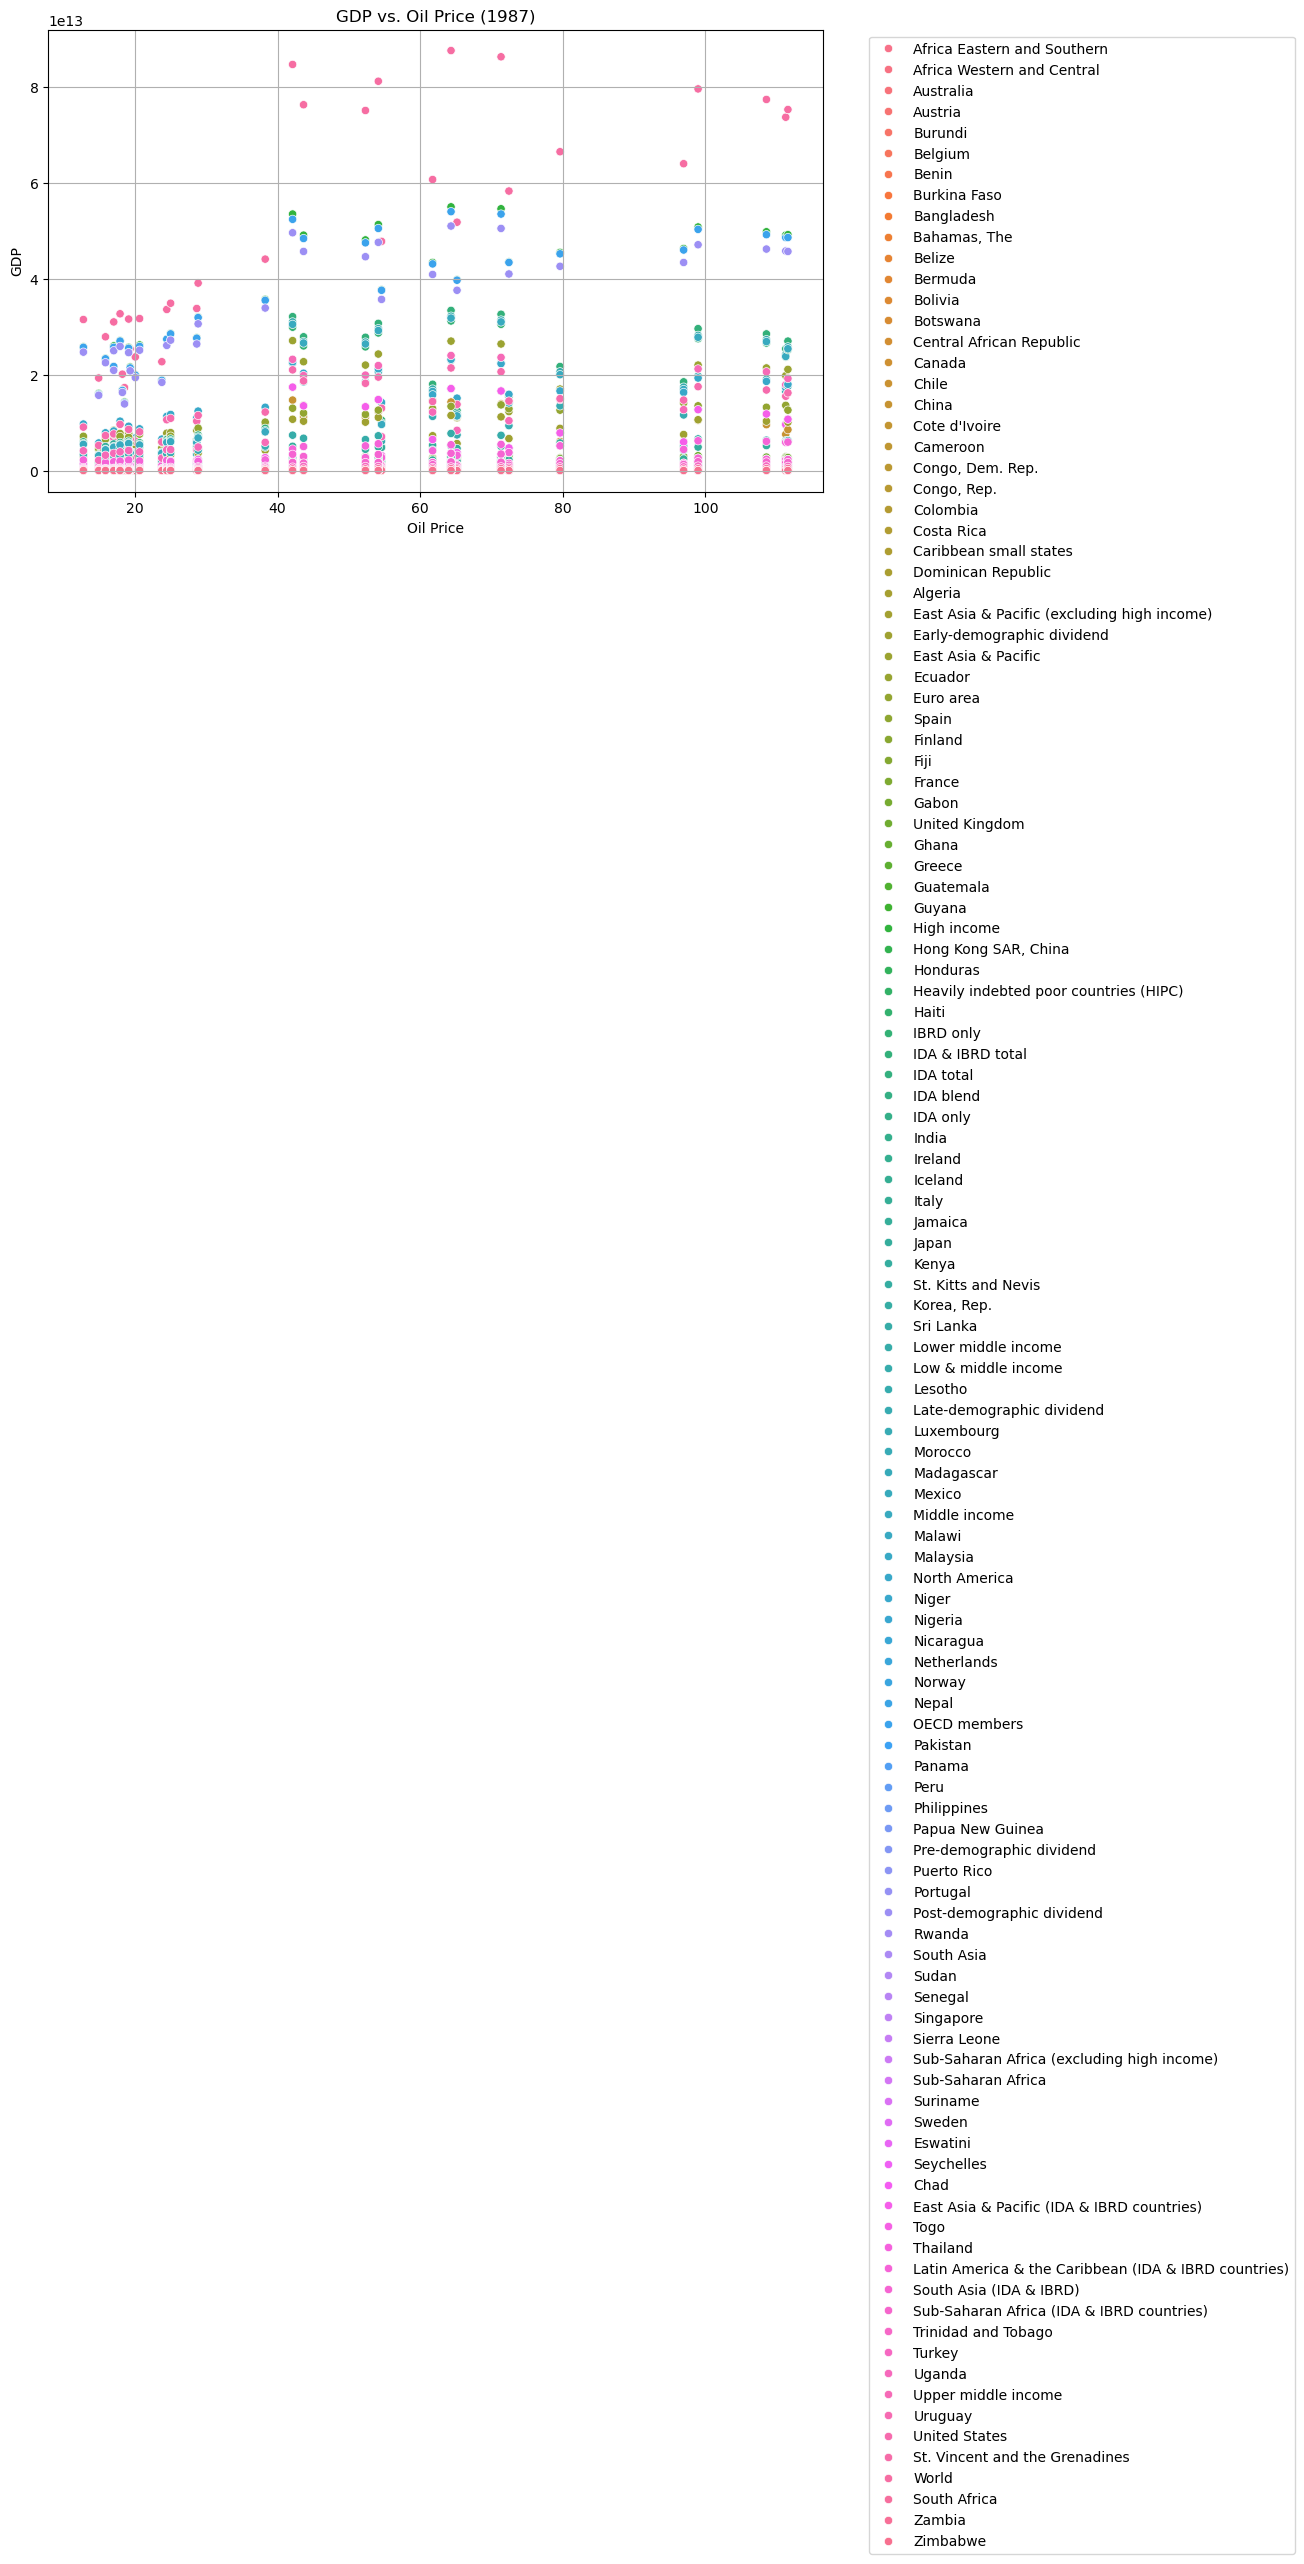

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=oil_country_data_cleaned, x='Price', y='GDP', hue='Country Name')
plt.title('GDP vs. Oil Price (1987)')
plt.xlabel('Oil Price')
plt.ylabel('GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


              Year           GDP        Price
count  4080.000000  4.080000e+03  4080.000000
mean   2003.500000  2.786626e+12    46.145893
std       9.811911  8.453008e+12    31.288515
min    1987.000000  1.477481e+08    12.758103
25%    1995.000000  8.881316e+09    19.108508
50%    2003.500000  9.515315e+10    33.555254
75%    2012.000000  8.970000e+11    65.161765
max    2020.000000  8.760000e+13   111.570683


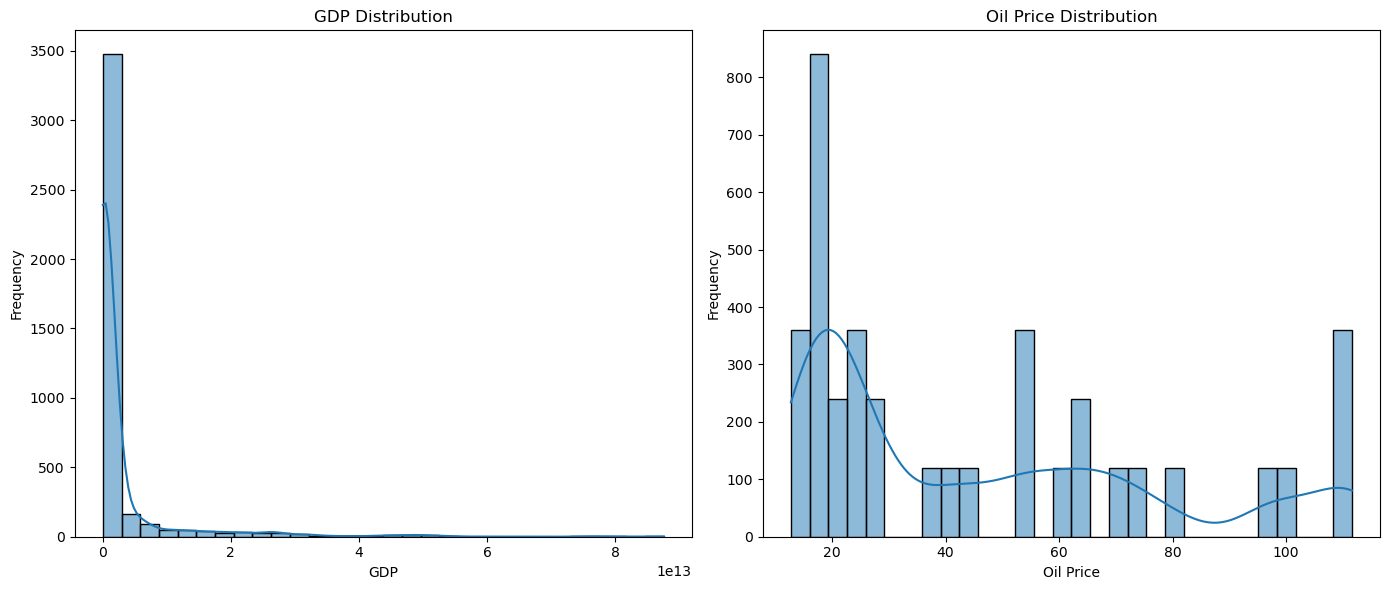

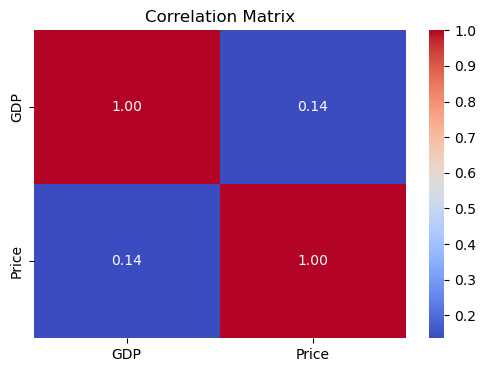

    Country Code           GDP      Price
0            AFE  5.357941e+11  46.145893
1            AFW  3.761797e+11  46.145893
2            AUS  7.664706e+11  46.145893
3            AUT  2.975588e+11  46.145893
4            BDI  1.559310e+09  46.145893
..           ...           ...        ...
115          VCT  5.139121e+08  46.145893
116          WLD  4.919118e+13  46.145893
117          ZAF  2.494053e+11  46.145893
118          ZMB  1.167720e+10  46.145893
119          ZWE  1.044810e+10  46.145893

[120 rows x 3 columns]


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the cleaned merged data in a DataFrame called 'oil_country_data_cleaned'

# 1. Descriptive Statistics
print(oil_country_data_cleaned.describe())

# 2. Distribution Plots
plt.figure(figsize=(14, 6))

# GDP Distribution
plt.subplot(1, 2, 1)
sns.histplot(oil_country_data_cleaned['GDP'], bins=30, kde=True)
plt.title('GDP Distribution')
plt.xlabel('GDP')
plt.ylabel('Frequency')

# Oil Price Distribution
plt.subplot(1, 2, 2)
sns.histplot(oil_country_data_cleaned['Price'], bins=30, kde=True)
plt.title('Oil Price Distribution')
plt.xlabel('Oil Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 3. Correlation Matrix
correlation = oil_country_data_cleaned[['GDP', 'Price']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 4. Group Analysis by Country Code
average_gdp_price_by_country = oil_country_data_cleaned.groupby('Country Code').agg({'GDP': 'mean', 'Price': 'mean'}).reset_index()
print(average_gdp_price_by_country)

# Save the cleaned merged data to a CSV file
oil_country_data_cleaned.to_csv('../data/cleaned_oil_country_data.csv', index=False)


              Year           GDP        Price
count  4080.000000  4.080000e+03  4080.000000
mean   2003.500000  2.786626e+12    46.145893
std       9.811911  8.453008e+12    31.288515
min    1987.000000  1.477481e+08    12.758103
25%    1995.000000  8.881316e+09    19.108508
50%    2003.500000  9.515315e+10    33.555254
75%    2012.000000  8.970000e+11    65.161765
max    2020.000000  8.760000e+13   111.570683


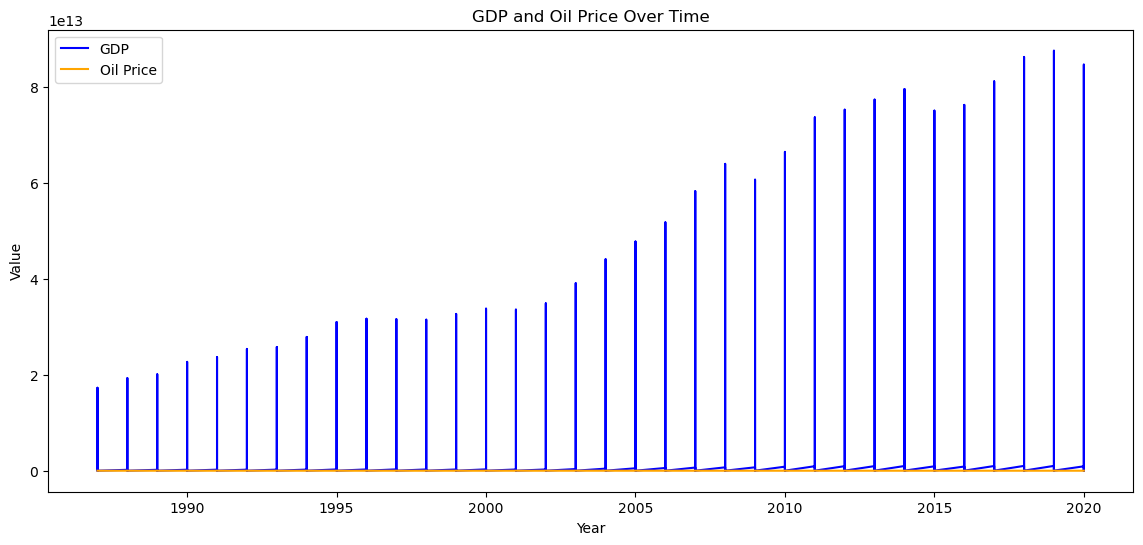

ValueError: could not convert string to float: 'Africa Eastern and Southern'

<Figure size 600x400 with 0 Axes>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned merged data
oil_country_data_cleaned = pd.read_csv('../data/cleaned_oil_country_data.csv')

# 1.1 Descriptive Statistics
print(oil_country_data_cleaned.describe())

# 1.2 Time Series Visualization
plt.figure(figsize=(14, 6))
plt.plot(oil_country_data_cleaned['Year'], oil_country_data_cleaned['GDP'], label='GDP', color='blue')
plt.plot(oil_country_data_cleaned['Year'], oil_country_data_cleaned['Price'], label='Oil Price', color='orange')
plt.title('GDP and Oil Price Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

# 1.3 Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(oil_country_data_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


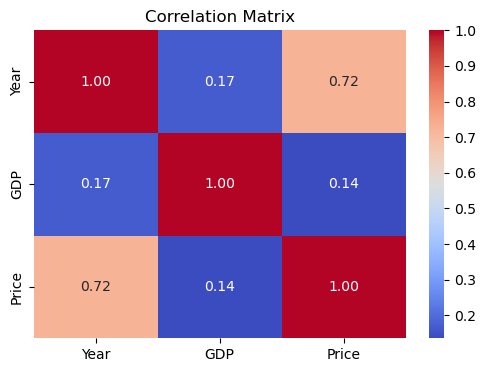

In [20]:
# Select only numeric columns for correlation matrix
numeric_columns = oil_country_data_cleaned.select_dtypes(include=['number'])
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prepare data for modeling
X = oil_country_data_cleaned[['GDP']]  # Independent variable
y = oil_country_data_cleaned['Price']   # Dependent variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.1 ARIMA Model
# Fitting the ARIMA model (example parameters, adjust as needed)
arima_model = ARIMA(y, order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# 2.2 Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Model Evaluation for Random Forest
rf_rmse = mean_squared_error(y_test, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print(f'Random Forest RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}')


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4080
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6972.356
Date:                Tue, 05 Nov 2024   AIC                          13950.712
Time:                        17:10:38   BIC                          13969.653
Sample:                             0   HQIC                         13957.419
                               - 4080                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       8.945e-06    1.9e-13   4.71e+07      0.000    8.95e-06    8.95e-06
ma.L1      -8.945e-06    1.9e-13  -4.71e+07      0.000   -8.95e-06   -8.95e-06
sigma2         1.7874      0.002    800.983      0.0

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [19]:
# Evaluate ARIMA
arima_predictions = arima_result.predict(start=len(X_train), end=len(X_train) + len(X_test) - 1)
arima_rmse = mean_squared_error(y_test, arima_predictions, squared=False)
arima_mae = mean_absolute_error(y_test, arima_predictions)
arima_r2 = r2_score(y_test, arima_predictions)

print(f'ARIMA RMSE: {arima_rmse}, MAE: {arima_mae}, R²: {arima_r2}')


ARIMA RMSE: 38.20176708403949, MAE: 32.65187672150751, R²: -0.5620574297038605


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(oil_country_data_cleaned['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.5042957781302422
p-value: 0.531385218628495


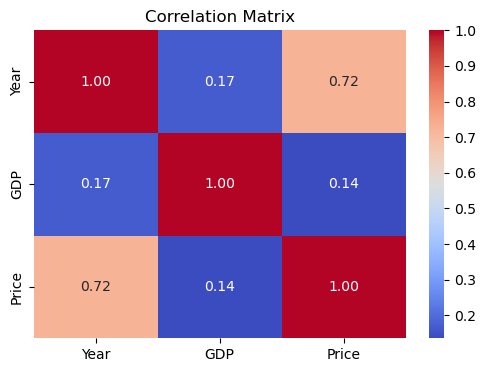

ADF Statistic: -1.5042957781302422
p-value: 0.531385218628495
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 4080
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6972.356
Date:                Tue, 05 Nov 2024   AIC                          13950.712
Time:                        17:14:22   BIC                          13969.653
Sample:                             0   HQIC                         13957.419
                               - 4080                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1       8.945e-06    1.9e-13   4.71e+07      0.000    8.95e-06    8.95e-06
ma.L1      -8.945e-06    1.9e-13  -4.71e+07      0.000   -8.95e-06   

C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tsa.stattools import adfuller

# Load cleaned data
oil_country_data_cleaned = pd.read_csv('../data/cleaned_oil_country_data.csv')

# 1. Correlation Heatmap (Numeric only)
numeric_columns = oil_country_data_cleaned.select_dtypes(include=['number'])
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 2. Stationarity Test
result = adfuller(oil_country_data_cleaned['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# 3. ARIMA Model Fitting
# Ensure 'Price' is stationary, and difference if necessary
# Fit ARIMA model (adjust parameters as needed)
arima_model = ARIMA(oil_country_data_cleaned['Price'], order=(1, 1, 1))
arima_result = arima_model.fit()
print(arima_result.summary())

# 4. Random Forest Model
X = oil_country_data_cleaned[['GDP']]
y = oil_country_data_cleaned['Price']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)
rf_predictions = rf_model.predict(X)

# 5. Evaluate Random Forest Model
rf_rmse = mean_squared_error(y, rf_predictions, squared=False)
rf_mae = mean_absolute_error(y, rf_predictions)
rf_r2 = r2_score(y, rf_predictions)

print(f'Random Forest RMSE: {rf_rmse}, MAE: {rf_mae}, R²: {rf_r2}')
